# Credit Risk Modeling with Survival Analysis: Exploratory Data Analysis

#### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
import kagglehub
import os

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### Import Data

In [7]:
df = pd.read_csv('loans_full_schema.csv')

### Data Structure 

In [11]:
df.shape

(10000, 55)

In [13]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

#### Duplicated Values

In [168]:
print(f'The number of duplicate records present in dataset: {df.duplicated().sum()}')

The number of duplicate records present in dataset: 0


#### Insights for Data Preprocessing after reviewing Data Structure:
- The data set contains 10000 samples and 55 total columns.
- Data types include: float64(17), int64(25), object(13).
- Several columns contain considerable missing data.
- There are no duplicated records present in the dataset.
- `issue_month` consider parsing into a date/time format
- `grade` and `sub_grade` are likely ordinal categories
- `loan_status` is the primary target variable for default prediction.

### Descriptive Statistics and Distribution

#### Catergorical Features

In [22]:
df_cat = df.select_dtypes(include='object')
df_cat.describe()

,emp_title,state,homeownership,verified_income,verification_income_joint,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
count,9167,10000,10000,10000,1455,10000,10000,10000,10000,10000,10000,10000,10000
unique,4741,50,3,3,3,12,2,7,32,3,6,2,2
top,manager,CA,MORTGAGE,Source Verified,Not Verified,debt_consolidation,individual,B,B1,Mar-2018,Current,whole,Cash
freq,218,1330,4789,4116,611,5144,8505,3037,647,3617,9375,8206,9284


#### Numerical Features

In [24]:
df_num = df.select_dtypes(include=np.number)
df_num.describe()

,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,...,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,tax_liens,public_record_bankrupt,loan_amount,term
count,10000.00000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.0000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.21600,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,0.0001,...,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,0.043300,0.123800,16361.922500,43.272000
std,0.68366,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,0.0100,...,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,0.593852,0.337172,10301.956759,11.029877
min,0.00000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,36.000000
25%,0.00000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,0.0000,...,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,0.000000,0.000000,8000.000000,36.000000
50%,0.00000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,0.0000,...,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,0.000000,0.000000,14500.000000,36.000000
75%,0.00000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,0.0000,...,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,0.000000,0.000000,24000.000000,60.000000
max,13.00000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.000000,1.0000,...,32.000000,386700.000000,66.000000,46.000000,43.000000,14.000000,52.000000,3.000000,40000.000000,60.000000


#### Checking for high cardinality features
A necessary step to reduce risk of overfitting during the training process as high cardinality features can cause models to learn specific, rare patterns rather than generalizable insights. Very sparse matrices can make it harder for models to learn underlying patterns because they dilute the meaningful co-occurrence signals. In addtion to the loss of generalized insights due to extreme dimensionality, computational inefficiency (e.g., creating too many columns with one-hot encoding) and increased memory consumption are other pitfulls of high cardinality. 

In [29]:
cat_df = df.select_dtypes(include='object')
df_unique = cat_df.nunique().to_frame().rename(columns={0: 'Count of unique values'}).sort_values(by='Count of unique values',ascending=False)
print(df_unique)

                           Count of unique values
emp_title                                    4741
state                                          50
sub_grade                                      32
loan_purpose                                   12
grade                                           7
loan_status                                     6
homeownership                                   3
verified_income                                 3
verification_income_joint                       3
issue_month                                     3
application_type                                2
initial_listing_status                          2
disbursement_method                             2


#### Checking for zero variance columns to drop
If a feature has zero or low variance it has little to no predictive power. It cannot help a model learn any patterns or make any predictions about the target variable. During data preprocessing, issues with standardize will occur if a zero-variance column in present. The standardization process requires dividing by zero (e.g. StandardScalar) which results in NaN or Inf values and will crash the pipeline.

In [32]:
df_numeric = df.select_dtypes(include=np.number)
variances = df_numeric.var()
zero_var_columns = variances[variances == 0].index.tolist()
print(zero_var_columns)

['num_accounts_120d_past_due']


#### Checking for class imbalance in target Variable

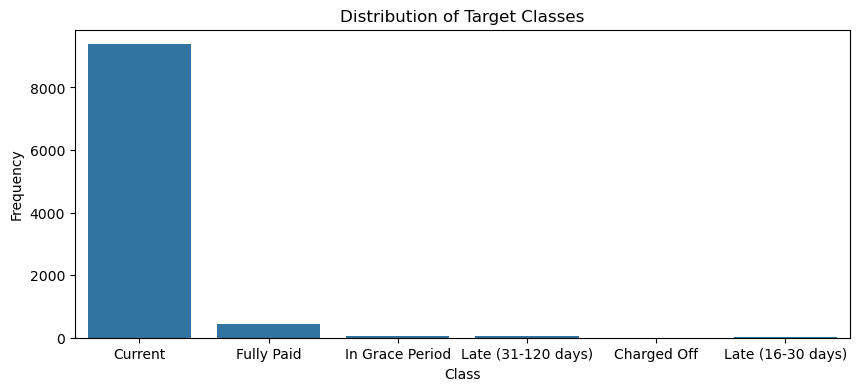

In [35]:
plt.figure(figsize=[10,4])
sns.countplot(df, x='loan_status')
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Checking the distribution of the numerical features

In [38]:
def univariate_analysis_plots(df, features_list, kde=True, figsize=(24, 40)):
    num_plots = len(features_list)
    rows = int(np.ceil(num_plots / 2)) 

    plt.figure(figsize=figsize)
    for i, col in enumerate(features_list):
        plt.subplot(rows, 2, i + 1) 
        sns.histplot(df[col].dropna(), kde=kde) 
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

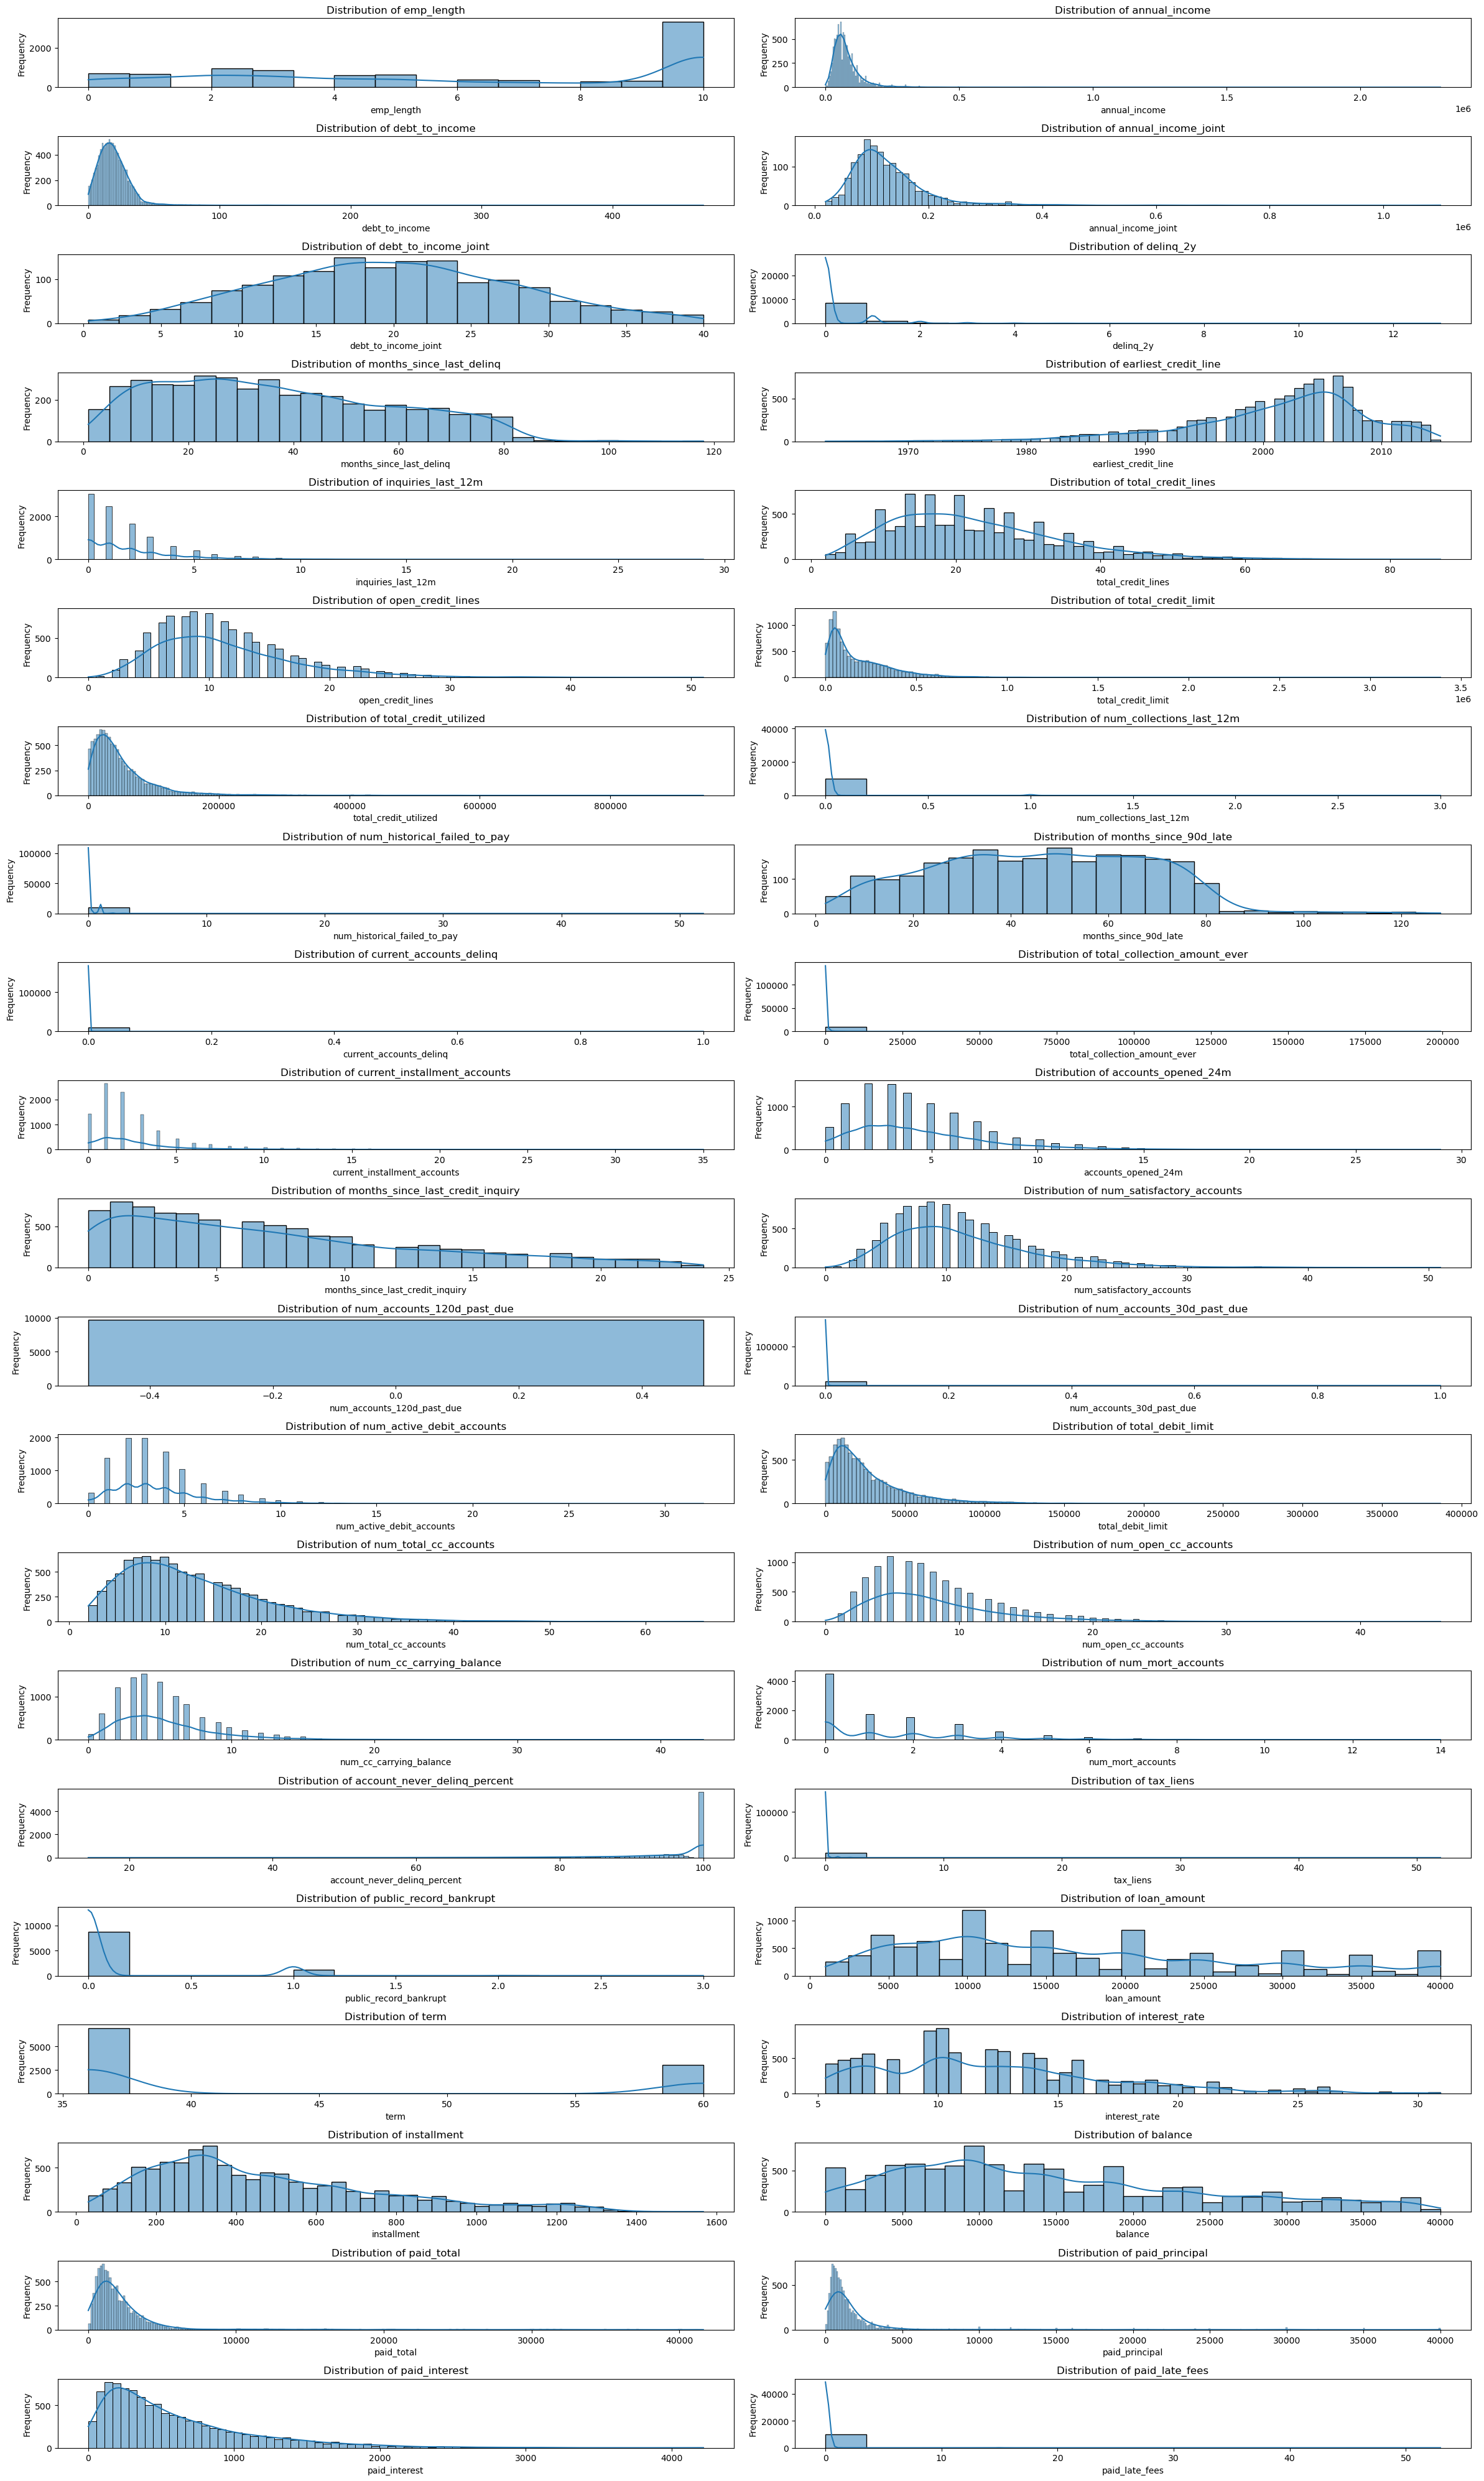

In [40]:
numerical_features = df.select_dtypes(include=np.number)

histogram_features = [col for col in numerical_features]
univariate_analysis_plots(df, histogram_features, kde=True, figsize=(24, 40))

#### Checking the distribution of the categorical features

In [43]:
def univariate_analysis_countplots(df, features_list, figsize=(24, 40)):
    num_plots = len(features_list)
    rows = int(np.ceil(num_plots / 2)) 

    plt.figure(figsize=figsize)
    for i, col in enumerate(features_list):
        plt.subplot(rows, 2, i + 1) 
        sns.countplot(df[col].dropna()) 
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

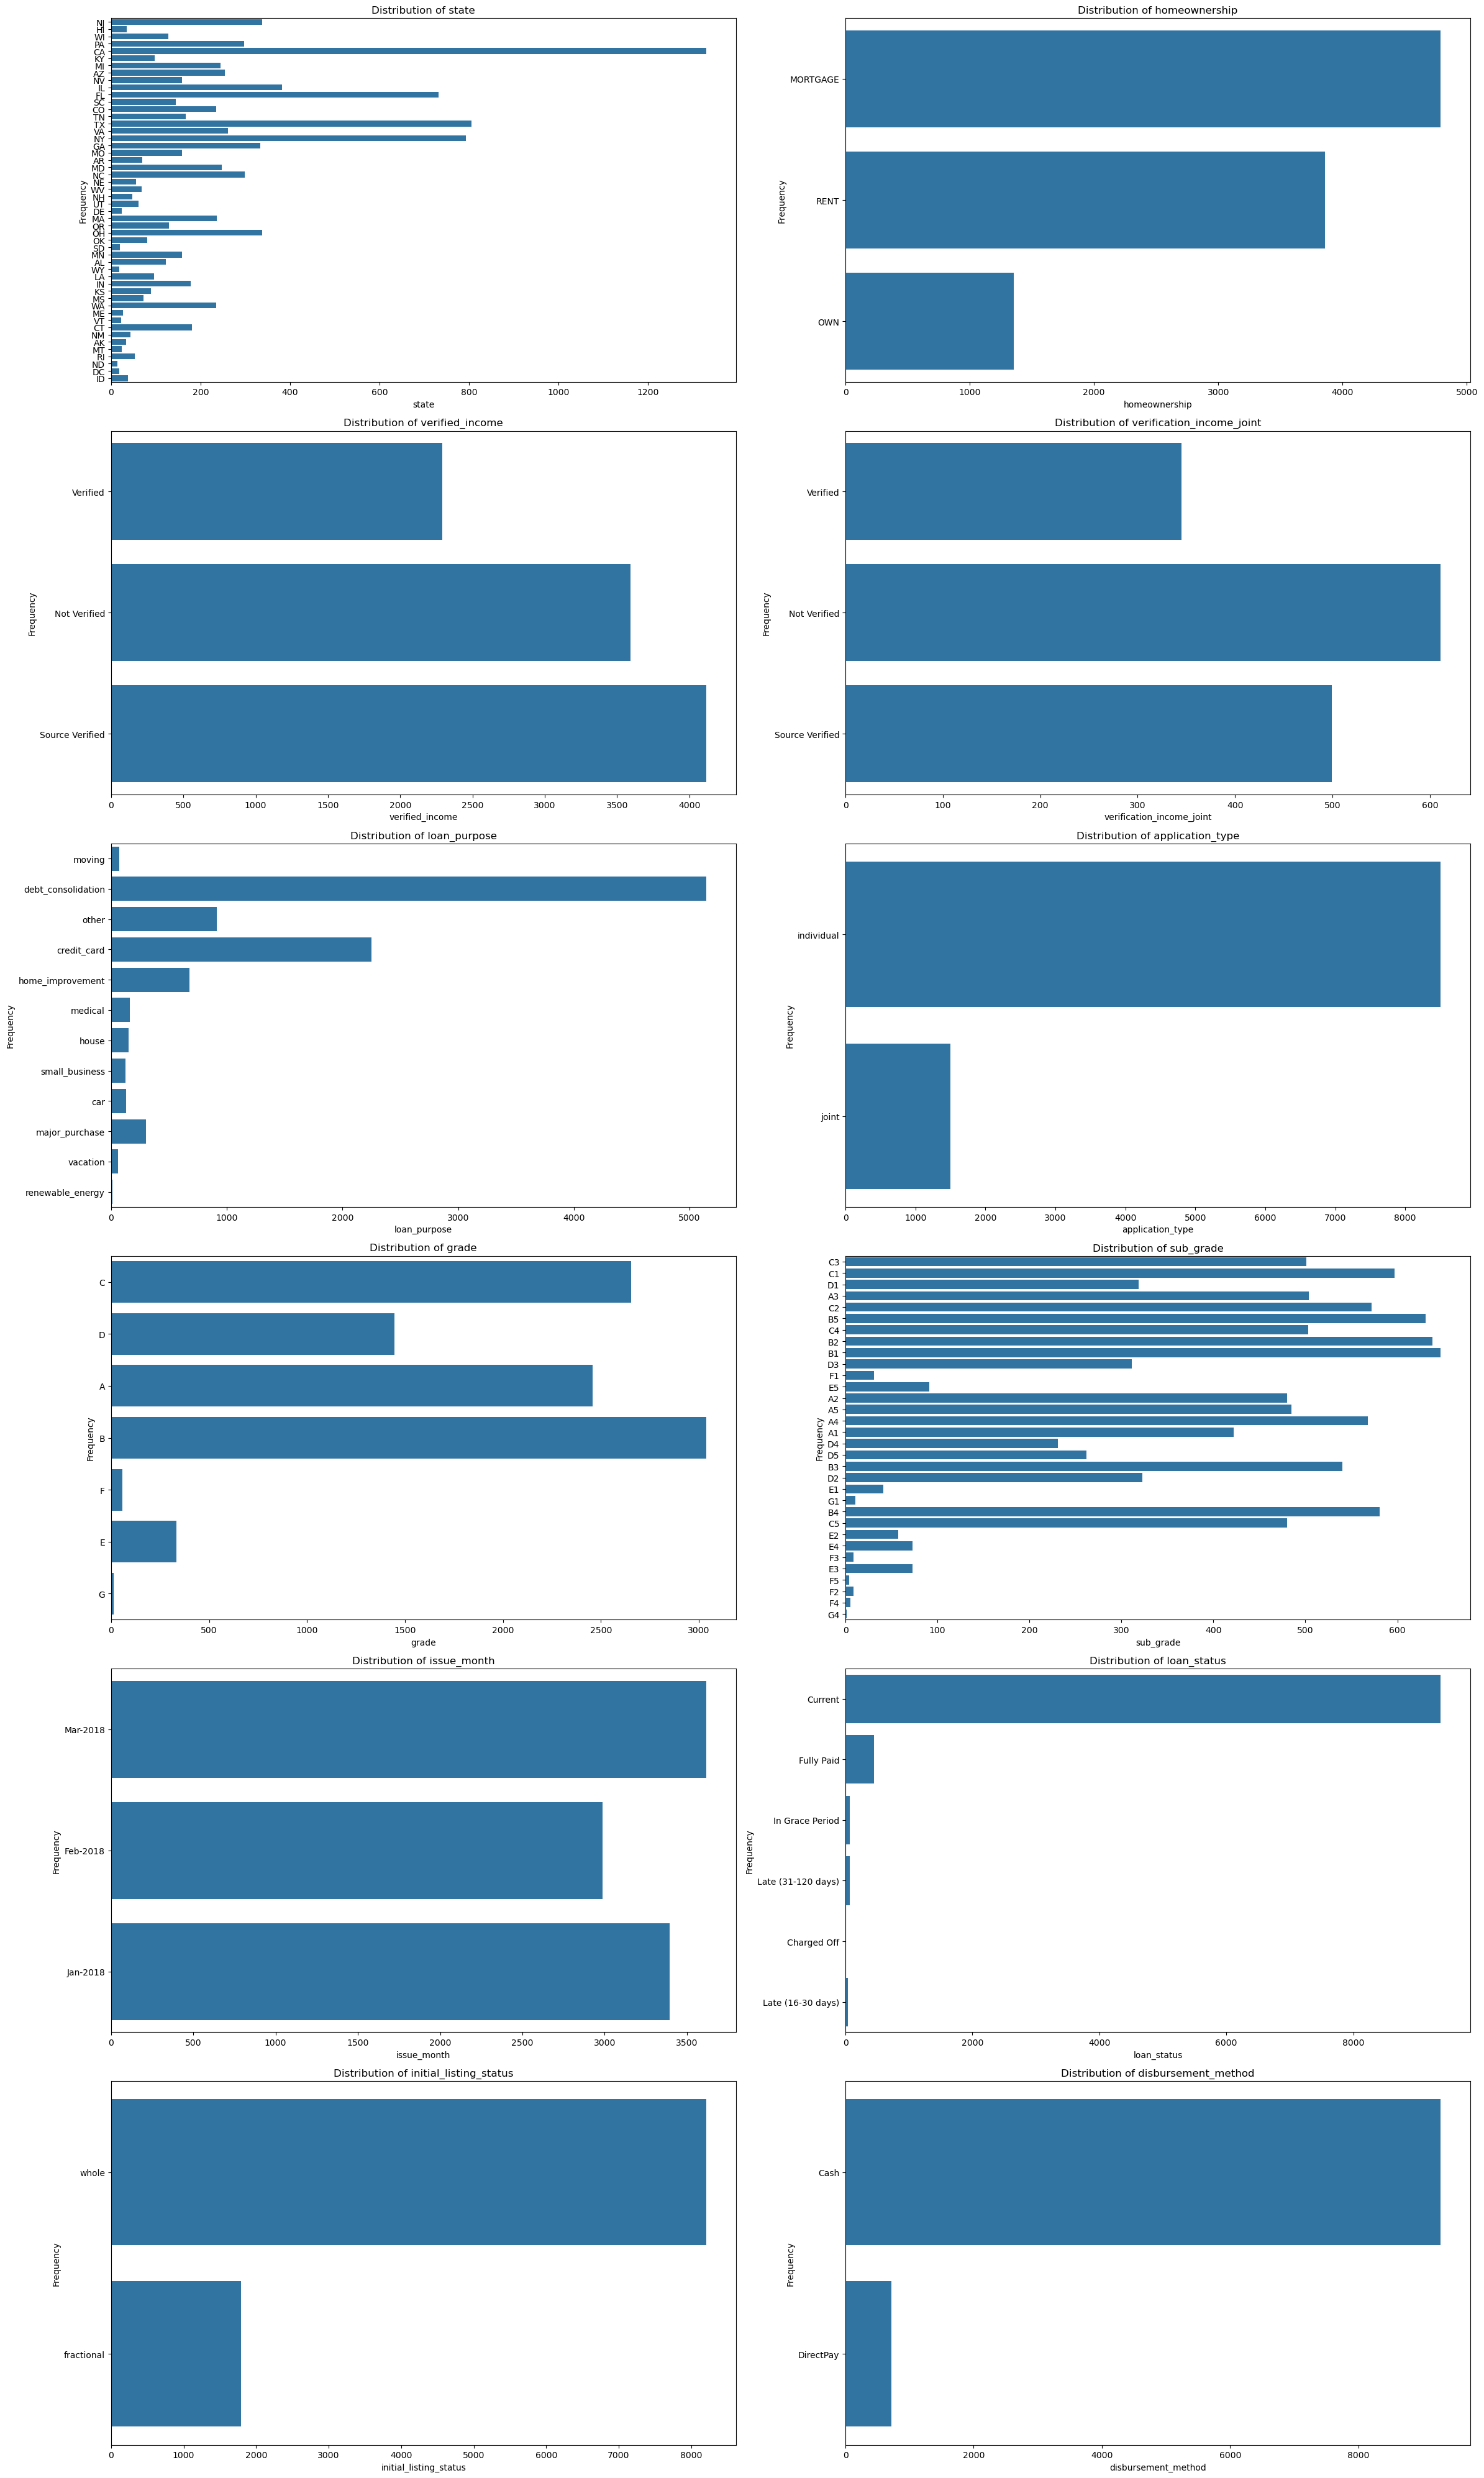

In [51]:
categorical_features = df.select_dtypes(include='object')

countplot_features = [col for col in categorical_features if col not in set(['emp_title'])]
univariate_analysis_countplots(df, countplot_features, figsize=(24, 40))

#### Insights for Data Preprocessing after reviewing Descriptive Statistics and Distribution:
__Catergorical Features__
- `Emp_title` column has high cardinality. I will consider text processing, target encoding, or embeddings if deemed highly predictive.
- The mode of `loan_status` is __Current__. There is very large class imbalance in target variable.
- Though numeric `term`, has a discrete nature thus it will be treated as categorical. 

__Numerical Features__
- The following columns show right skewness and potential outliers: `annual_income`, `debt_to_income`, `installment`, `balance`, `paid_total`, `paid_principal`, `paid_interest`, `delinq_2years`, `total_credit_limit`, `total_credit_utilized`, `num_historical_failed_to_pay`, `tax_liens`, and `loan_amount`. Outlier Treatment: Capping, winsorization, or removal for extreme values if the data is of an erroneous nature. Transformations: Log transformation or other power transformations for highly skewed distributions before modeling, especially for linear models.
- `num_accounts_120d_past_due` has zero variance and is likely to be uninformative. This column will likely be dropped from the dataset.
- `grade` and `subgrade` are ordinal features. Label encoding is the most likely strategy to capture the ordinality. During experimentation I will consider direct mapping to numerical scores to determine if this strategy preserves this information better.
- `num_collections_last_12m`, `num_historical_failed_to_pay`, `current_accounts_delinq`, `tax_liens`, and `public_record_bankrupt` have a sparse feature count indicating they may not contribute much predictive power to the model. I will consider dropping them from the dataframe or leverage them during feature engineering.


### Missing Values

In [46]:
df_missing = df.isna().sum()/ len(df) * 100
df_missing = df_missing[df_missing > 0]
print(df_missing)

emp_title                            8.33
emp_length                           8.17
debt_to_income                       0.24
annual_income_joint                 85.05
verification_income_joint           85.45
debt_to_income_joint                85.05
months_since_last_delinq            56.58
months_since_90d_late               77.15
months_since_last_credit_inquiry    12.71
num_accounts_120d_past_due           3.18
dtype: float64


In [184]:
threshold = 50
greater_than_threshold_missing_df = df_missing[df_missing > threshold].index.tolist()
print(greater_than_threshold_missing_df)

['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late']


#### Insights for Data Preprocessing after reviewing data missing. 
We can determine that joint applicant data is Sparse. `annual_income_joint` (1495 non-null), `verification_income_joint` (1455 non-null), and `debt_to_income_joint` (1495 non-null) are almost entirely missing for the majority of loans. This strongly suggests that most applications are single-applicant loans. Therefore the strategies to explore for the joint columns are as follows:
- __Delete columns__: Omit the information from the dataset entirely. Further exploration regarding the nature of the missingness is required. Dropping the columns in instances of Missing Completely at Random (MCAR) and Missing at Random (MAR) is an appropriate option.
- __Create a Binary Indicator__: Add a new column,`is_joint_application`, which is 1 if any of `annual_income_joint`, `verification_income_joint`, or `debt_to_income_joint` is not null, and 0 otherwise. This explicitly captures the presence or absence of a joint applicant.
- __Imputation of columns__: I've included this option for completeness, but it is a poor strategy given the amount of missing data. Given that roughly 85% of the data for these joint fields is missing, any imputation method (e.g. Iterative Imputer, Simple Imputer, .fillna()) would severely bias the dataset. This added noice would likely mislead the model.

### Outliers 

In [78]:
results = {}
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    values = df[col].dropna()
    
    if len(values) == 0:
        results[col] = 0.0
        continue
        
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (values < lower_bound) | (values > upper_bound)
    
    outlier_percentage = (outliers.sum() / len(values)) * 100
    results[col] = round(outlier_percentage, 2)

outlier_pct = pd.Series(results)
print(outlier_pct.sort_values(ascending=False))

delinq_2y                           14.24
num_historical_failed_to_pay        14.14
total_collection_amount_ever        13.65
public_record_bankrupt              12.15
account_never_delinq_percent         8.83
paid_principal                       8.31
current_installment_accounts         8.15
paid_total                           6.19
total_credit_utilized                5.68
total_debit_limit                    5.52
num_open_cc_accounts                 5.23
annual_income                        5.08
annual_income_joint                  4.55
paid_interest                        4.01
interest_rate                        3.64
total_credit_limit                   3.51
inquiries_last_12m                   3.49
open_credit_lines                    3.27
num_satisfactory_accounts            3.24
earliest_credit_line                 3.13
num_mort_accounts                    3.04
num_active_debit_accounts            2.63
num_total_cc_accounts                2.57
num_cc_carrying_balance           

In [132]:
def univariate_analysis_boxplots(df, features_list, figsize=(24,40)):
    num_plots = len(features_list)
    rows = int(np.ceil(num_plots / 4)) 

    plt.figure(figsize=figsize)
    for i, col in enumerate(features_list):
        plt.subplot(rows, 4, i + 1) 
        sns.boxplot(df[col].dropna()) 
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()


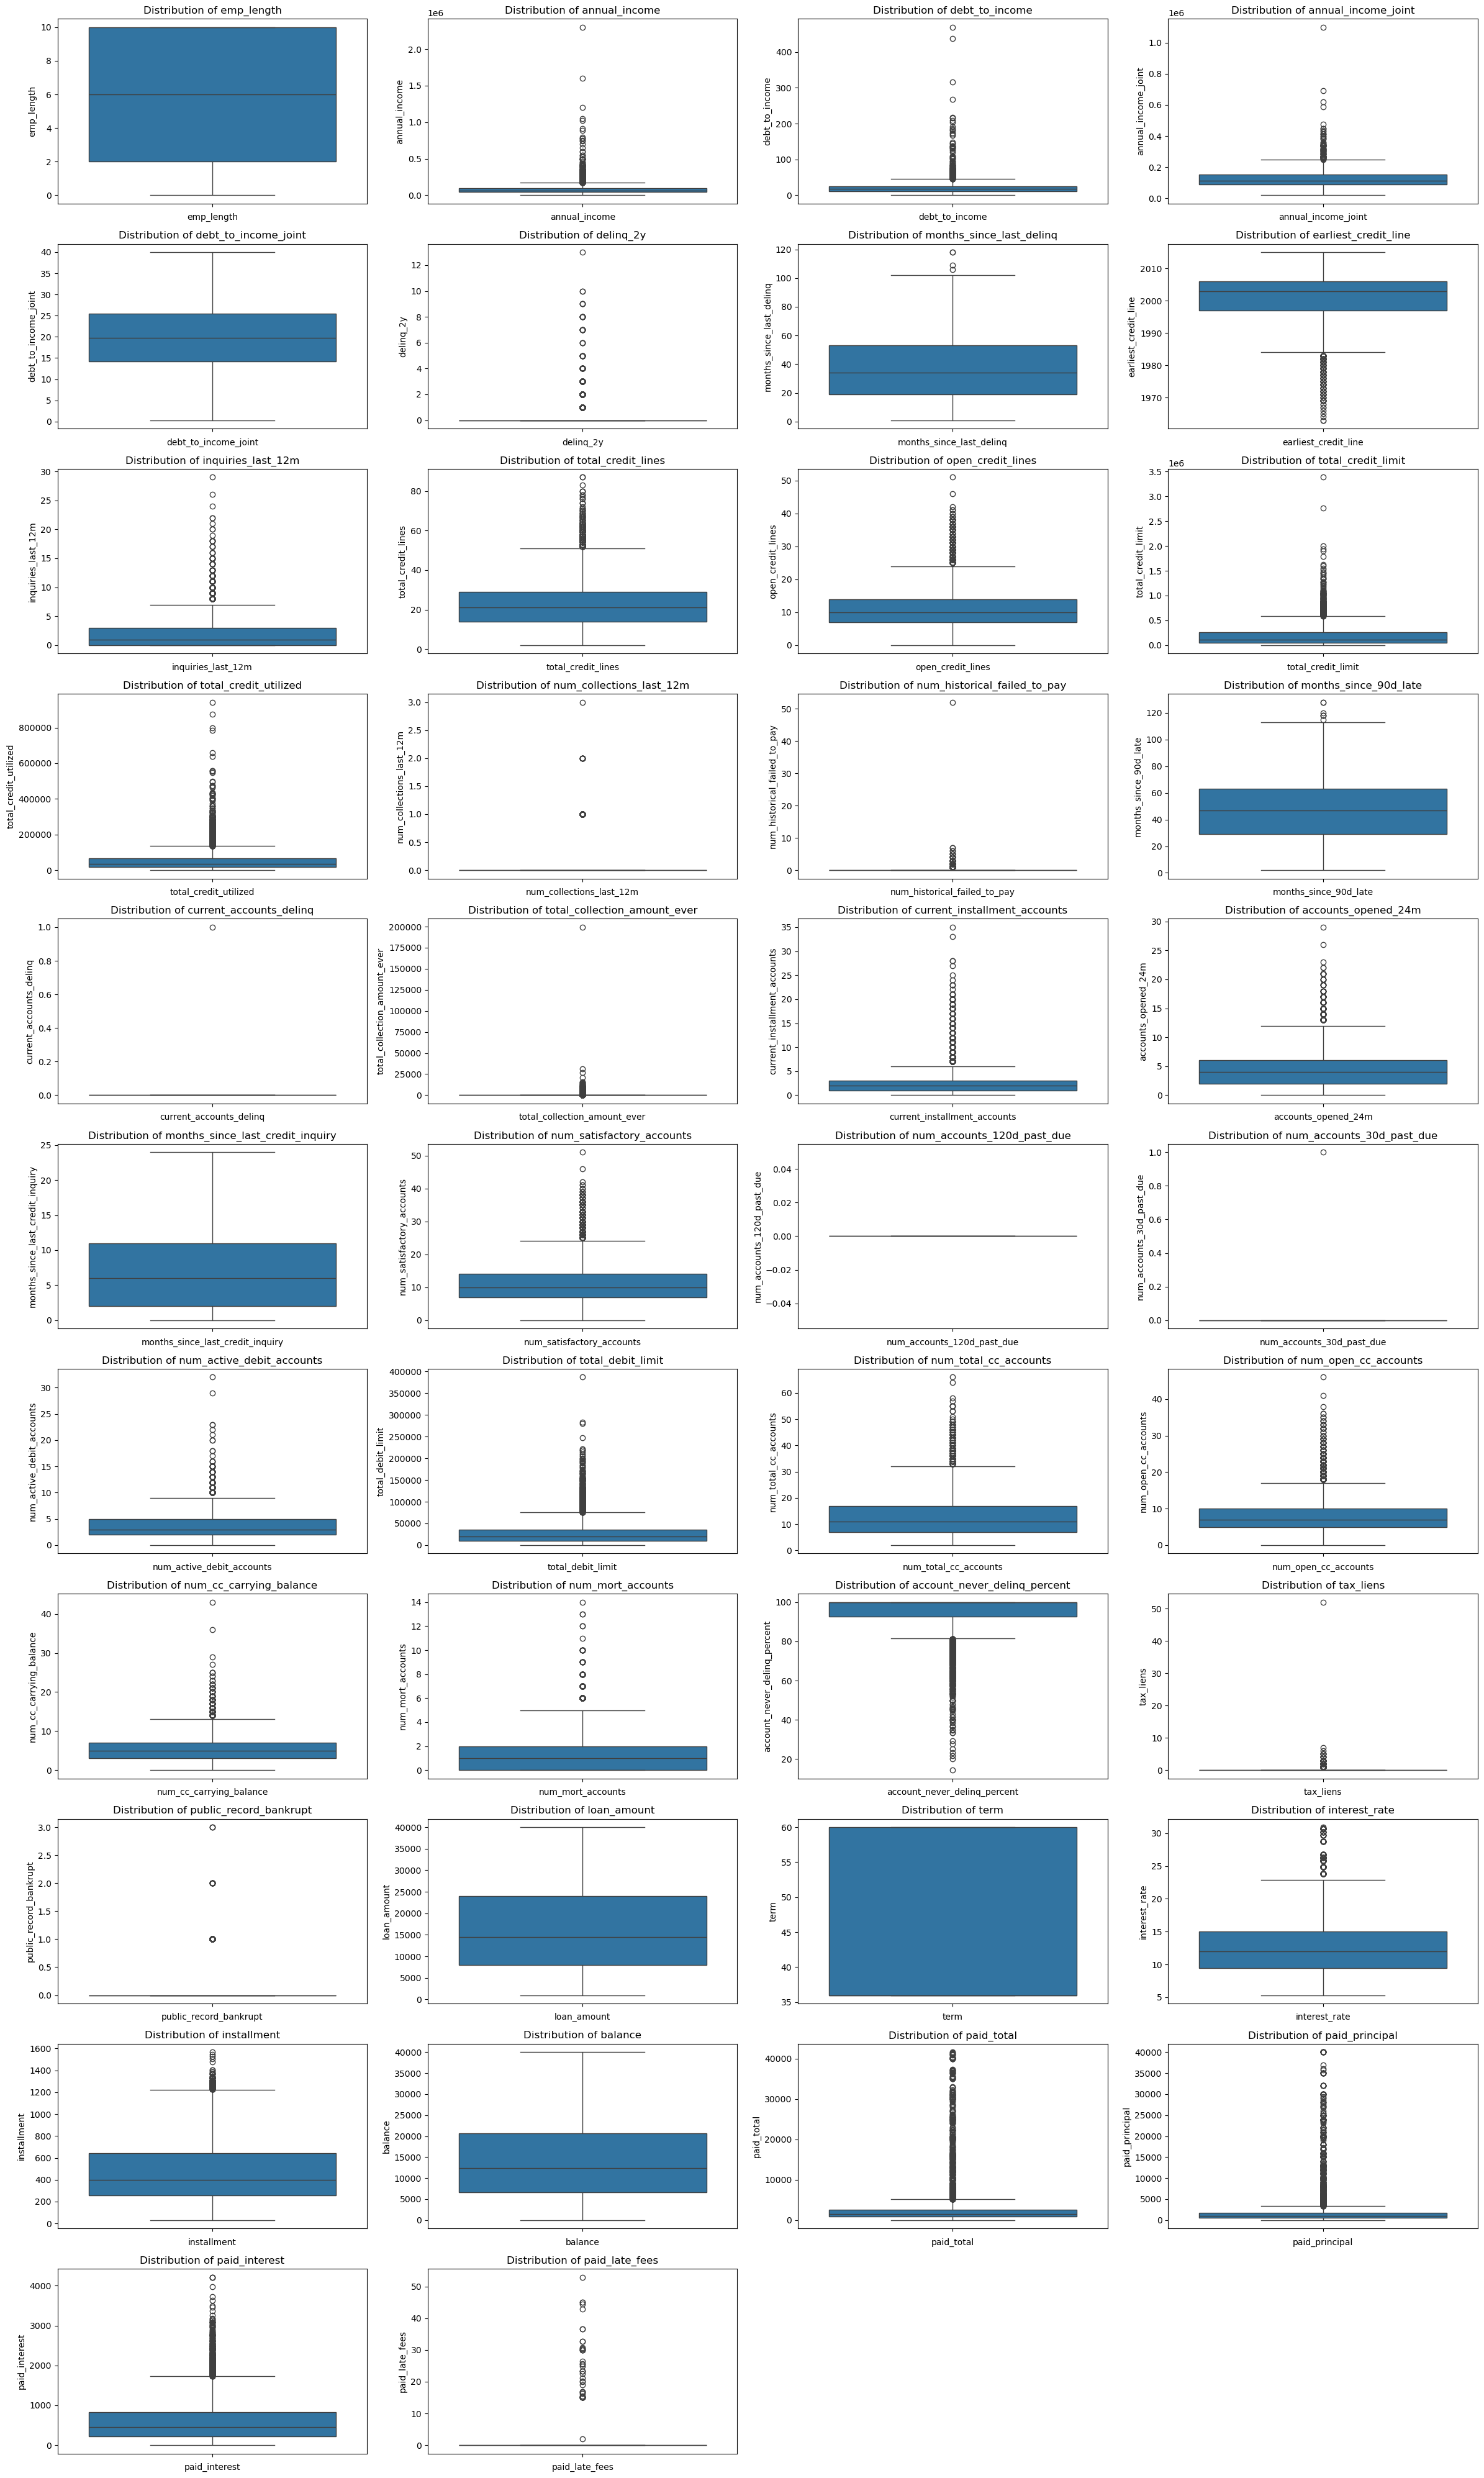

In [134]:
outliers = [col for col in numerical_features]
univariate_analysis_boxplots(df, outliers, figsize=(24,40))

#### Insights for Data Preprocessing after reviewing Descriptive Statistics and Distribution:

### Multivariate Analysis

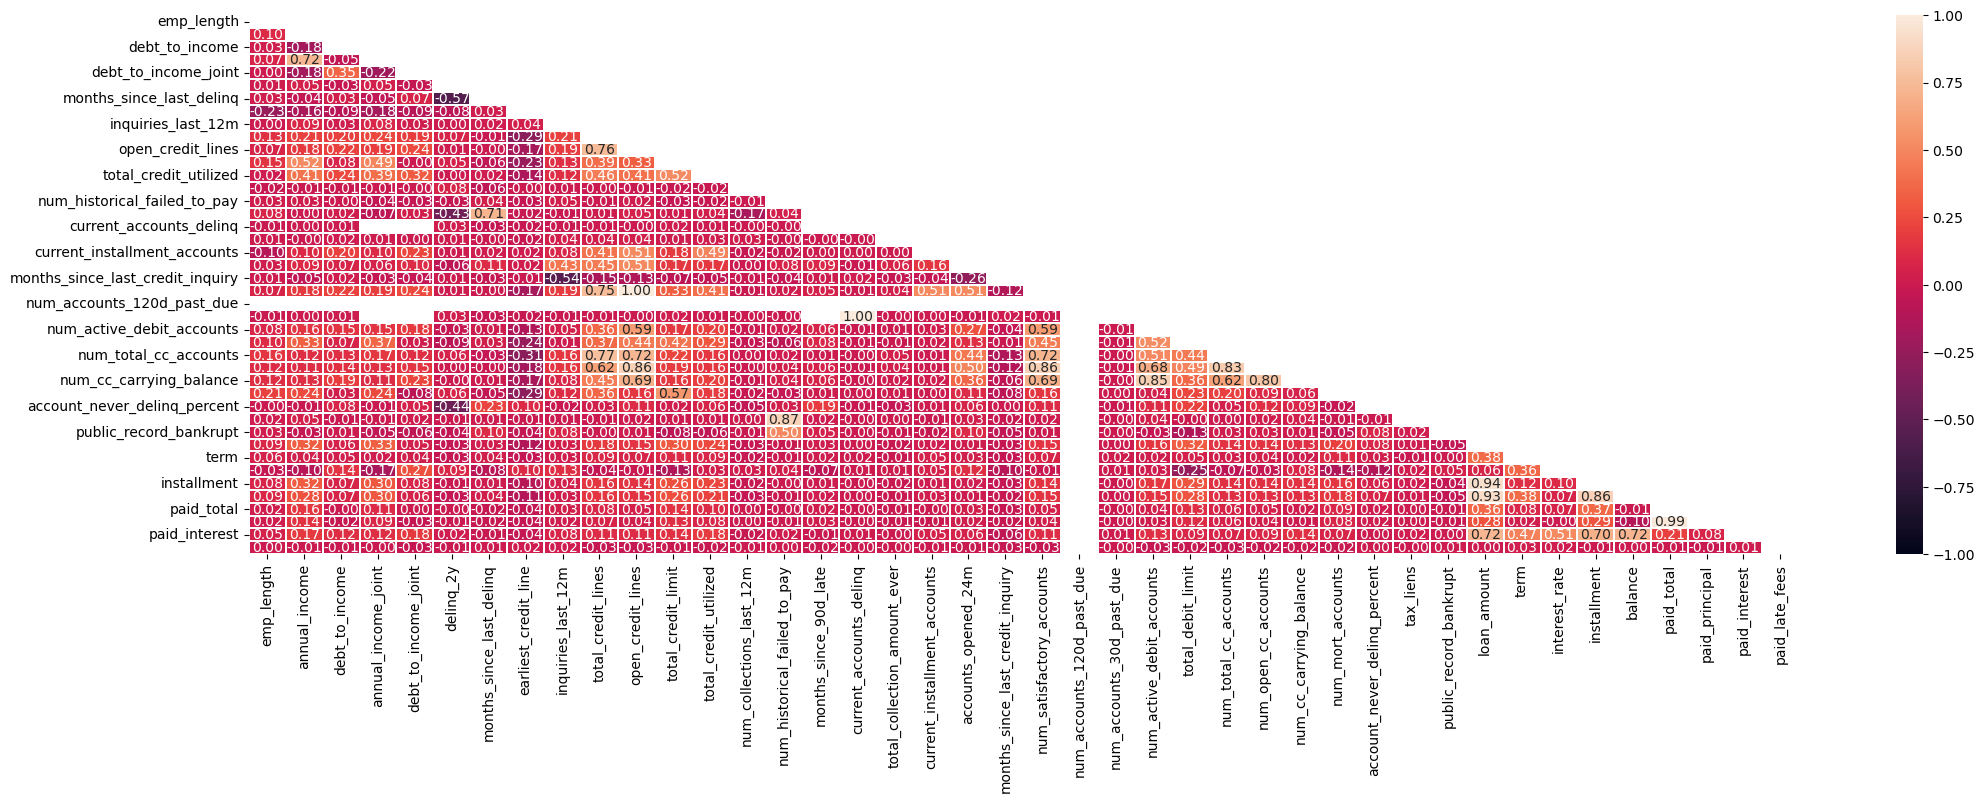

In [142]:
# Mask will remove the upper triangle.
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(25, 7))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=0.25, vmin=-1, vmax=1)
plt.show()

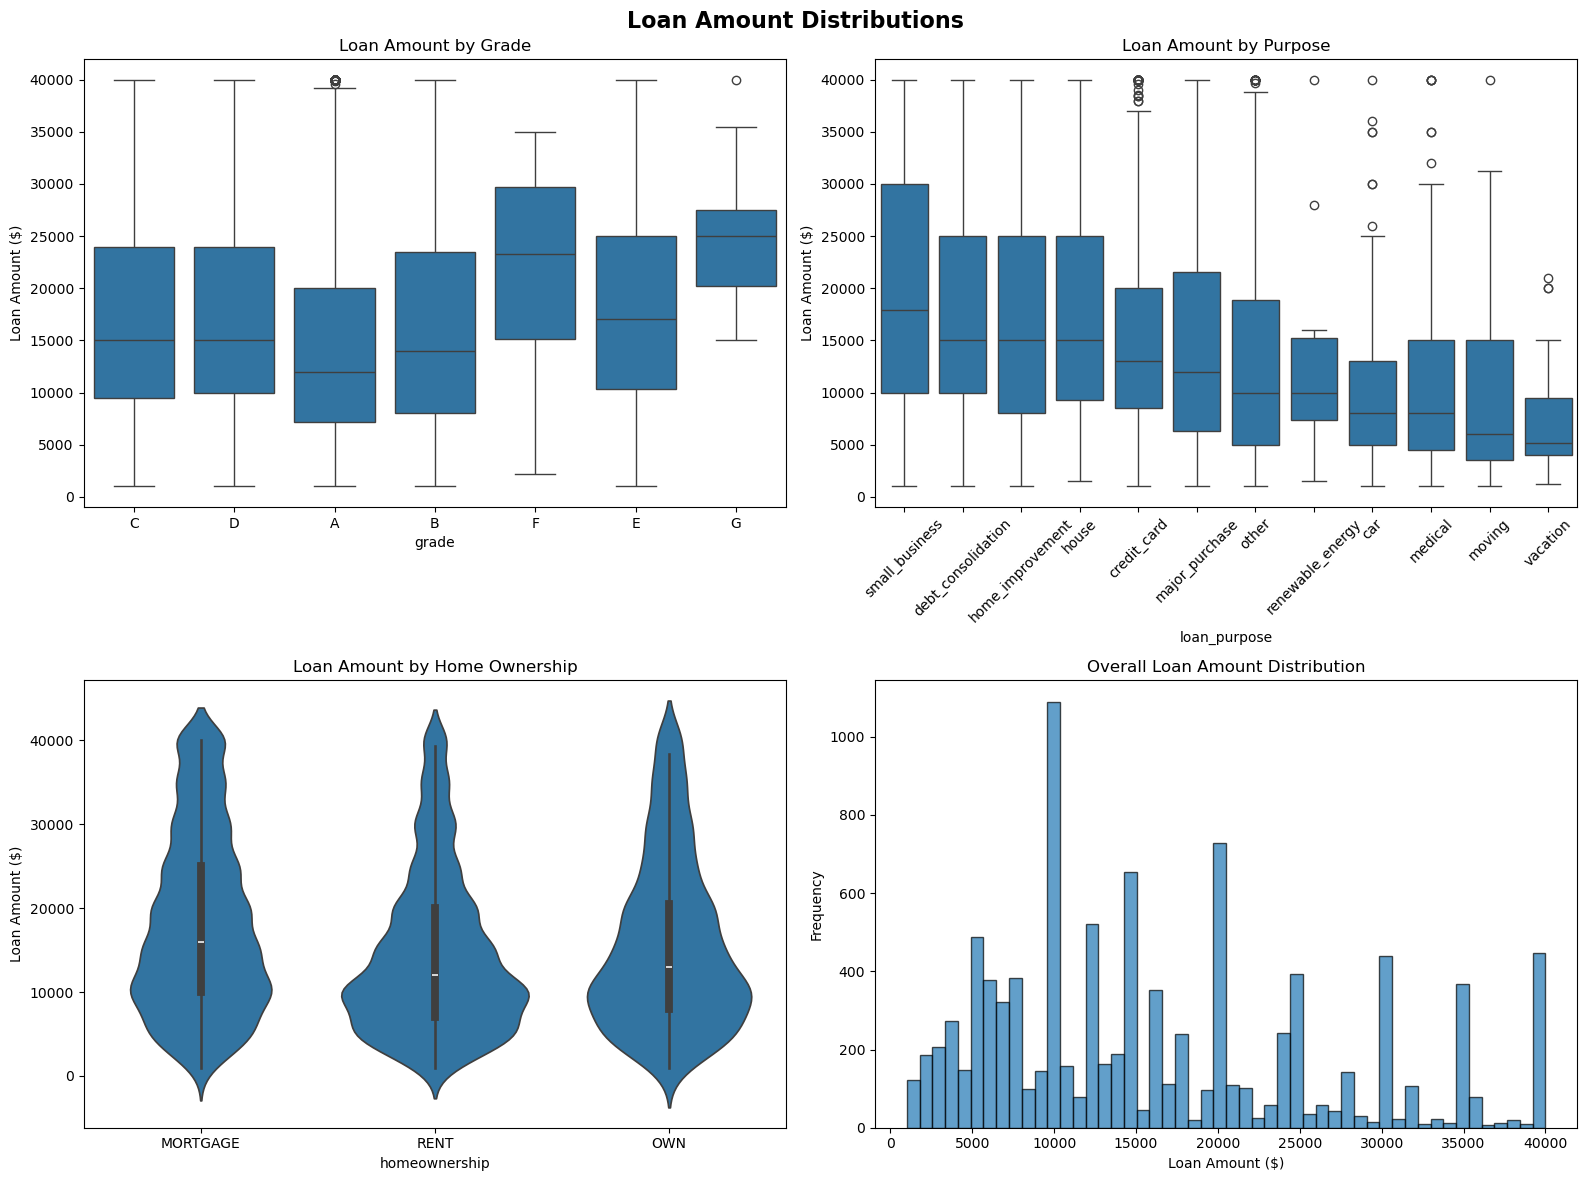

In [150]:
def plot_loan_amount_distribution(df):
    """Plot loan amount distributions by various categories"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Loan Amount Distributions', fontsize=16, fontweight='bold')
    
    # By grade
    sns.boxplot(data=df, x='grade', y='loan_amount', ax=axes[0,0])
    axes[0,0].set_title('Loan Amount by Grade')
    axes[0,0].set_ylabel('Loan Amount ($)')
    
    # By purpose
    purpose_order = df.groupby('loan_purpose')['loan_amount'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x='loan_purpose', y='loan_amount', order=purpose_order, ax=axes[0,1])
    axes[0,1].set_title('Loan Amount by Purpose')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].set_ylabel('Loan Amount ($)')
    
    # By homeownership
    sns.violinplot(data=df, x='homeownership', y='loan_amount', ax=axes[1,0])
    axes[1,0].set_title('Loan Amount by Home Ownership')
    axes[1,0].set_ylabel('Loan Amount ($)')
    
    # Overall distribution
    axes[1,1].hist(df['loan_amount'], bins=50, alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Overall Loan Amount Distribution')
    axes[1,1].set_xlabel('Loan Amount ($)')
    axes[1,1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_loan_amount_distribution(df)

#### Insights for Data Preprocessing after reviewing Multivariate Analysis:
- `loan_amount` and `installment`: As expected, these are almost perfectly correlated (0.99). This is because installment is largely a function of the loan amount, term, and interest rate.
- `loan_amount` is strongly positively correlated with `paid_total` (0.86), `paid_principal` (0.90), and `paid_interest` (0.75). This is logical: larger loans will naturally have larger principal, interest, and total amounts paid.
- `paid_total`, `paid_principal`, `paid_interest`, and `paid_late_fees` are outcomes of the loan's life, not features available at the time of application. They will be excluded from the model.
- `annual_income_joint` and `debt_to_income_joint` appear to be highly correlated with each other (0.97), which is expected as they describe the same joint financial situation. Their correlations with other features are very weak, due to the high percentage of missing data.
- Further analysis is needed to determine other important relationships between features as correlations only captures linear relationships. 

#### Business insights:

__There's a clear trend: as the grade letter progresses from A to G (indicating higher perceived risk or lower credit quality), the typical Loan Amount tends to increase.__
> - A, B, C, D grades: Median loan amounts appear lower, often in the $10,000 - $20,000 range.
> - E, F, G grades: Median loan amounts are noticeably higher, often reaching $20,000 - $25,000 or more. The spread (interquartile range, represented by the box) also seems to increase for higher grades.

Inference:

Risk vs. Loan Size: This is a crucial and somewhat counter-intuitive insight if one assumes safer loans (A-grade) would be larger. It suggests that borrowers with higher risk (lower grades) are either applying for, or being approved for, larger loan amounts.



__The distribution of loan amounts varies significantly by loan_purpose.__

> - "smart_business" loans have the highest median loan amount and also the largest spread, indicating a wide range of loan sizes for this purpose, with many larger loans.
> - "debt_consolidation" is also associated with relatively high loan amounts, often comparable to "smart_business" in median.
> - "home_improvement," "credit_card," "major_purchase" seem to have moderate to high loan amounts.
> - "car," "medical," "moving," "vacation," "renewable_energy" generally have much lower median loan amounts.

Inference:

This indicates that different marketing or lending strategies might be effective for different loan purposes, tailored to the typical amount required.




__All three categories (MORTGAGE, RENT, OWN) show similar overall patterns, with densities peaking around lower loan amounts (e.g., $5,000 - $15,000) and then gradually tapering off for larger amounts.__

> - However, MORTGAGE and OWN categories appear to have a slightly higher density for larger loan amounts compared to RENT.
> - The overall shape (distribution) of loan amounts is quite similar across homeownership types.

Inference:

Homeownership status doesn't appear to be a primary driver of the typical loan amount requested or approved. While owners (MORTGAGE, OWN) might take slightly larger loans more frequently than renters, the distributions are similar.




__There's a very high frequency of loans in the $5000 - $10000 range.__

> - Frequencies decrease significantly as the loan amount increases, with fewer very large loans.
> - There are noticeable peaks, possibly at common round numbers for loan amounts (e.g., $5000, $10000, $15000). 

Inference:

The peaks at specific intervals could indicate common loan products or application patterns where borrowers choose specific increments. Most loans issued by Lending Club are for smaller amounts.


__Overall Conclusion:__

The multivariate analysis provides strong evidence that loan grade and loan purpose are significant factors influencing the typical loan amount, with higher-risk grades and certain purposes (business, debt consolidation) being associated with larger loans. Homeownership status appears to have a less pronounced effect on loan amount distribution. The majority of loans are for smaller, rounded amounts. These insights reveal information about Lending Club's customer base.